In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


In [6]:
df = pd.read_csv(filepath_or_buffer= "Extract_Dataset.csv") 
df

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,0,Untap,in.untap,Entertainment,3.9,68.0,"10,000+",10000.0,10291,True,...,https://untap.in,hello@untap.in,"Nov 2, 2020","Nov 02, 2020",Everyone,NaN,False,False,False,2021-06-16 11:24:00
1,1,Green Meadows,com.ooweboowebengineers.greenmeadows,Lifestyle,0.0,0.0,50+,50.0,90,True,...,http://ooweboo.co.za,ray@ooweboo.co.za,"May 29, 2017","May 29, 2017",Everyone,http://appmc2.net/privacy?company=OOWEBOO%20We...,False,False,False,2021-06-16 10:54:34
2,2,YG SELECT,com.makeshop.powerapp.ygnext,Shopping,4.3,918.0,"100,000+",100000.0,135038,True,...,http://www.ygeshop.com,app.ygselect@gmail.com,"Jan 20, 2016","May 12, 2021",Everyone,http://www.ygeshop.com/m/privacy.html,True,False,False,2021-06-16 02:21:54
3,3,Vinca Wealth,com.bag4wealth,Finance,5.0,6.0,50+,50.0,53,True,...,https://bag4wealth.com,acmatics.app@gmail.com,"Jun 30, 2020","May 11, 2021",Everyone,https://bag4wealth.com/finnsys/app/privacy.php,False,False,False,2021-06-16 01:29:59
4,4,Drink recipes,com.drinks.recipes,Food & Drink,4.3,830.0,"100,000+",100000.0,142498,True,...,http://cookwithlove.biz/,andrei.nazarco@gmail.com,"May 20, 2014","Jul 13, 2020",Everyone,http://cookwithlove.biz/privacy_policy/drink_r...,True,False,False,2021-06-16 08:43:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Deep Memorial Public School,com.edunext.dmps,Education,4.3,142.0,"1,000+",1000.0,2490,True,...,http://www.edunexttechnologies.com,edunexttech@gmail.com,"Mar 4, 2016","Aug 26, 2020",Everyone,http://www.edunexttechnologies.com/terms-and-c...,False,False,False,2021-06-16 00:56:34
9996,9996,Anchored Sins,com.goc.anchoredsins3D,Role Playing,NaN,NaN,5+,5.0,8,True,...,https://www.gearoverclocked.com/projects,gearoverclocked@gmail.com,NaN,"Jan 03, 2020",Teen,NaN,False,False,False,2021-06-16 02:44:16
9997,9997,설운도 트로트 노래모음,korea.singer.sulundo,Music & Audio,5.0,9.0,"1,000+",1000.0,1035,True,...,http://israng.co.kr,parkhanye28@gmail.com,"Apr 23, 2020","Feb 03, 2021",Teen,https://docs.google.com/document/d/1C6-LdIQzH7...,True,False,False,2021-06-16 12:40:44
9998,9998,Coq,fr.enfantdoudou.coq,Entertainment,0.0,0.0,500+,500.0,522,True,...,NaN,pridgua@gmail.com,"Apr 16, 2020","Apr 16, 2020",Everyone,https://www.ftc.gov/tips-advice/business-cente...,True,False,False,2021-06-16 12:06:11


We can see that there is an index column called Unnamed, we need to make the first column index the primary index

In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Untap,in.untap,Entertainment,3.9,68.0,"10,000+",10000.0,10291,True,0.0,...,https://untap.in,hello@untap.in,"Nov 2, 2020","Nov 02, 2020",Everyone,NaN,False,False,False,2021-06-16 11:24:00
1,Green Meadows,com.ooweboowebengineers.greenmeadows,Lifestyle,0.0,0.0,50+,50.0,90,True,0.0,...,http://ooweboo.co.za,ray@ooweboo.co.za,"May 29, 2017","May 29, 2017",Everyone,http://appmc2.net/privacy?company=OOWEBOO%20We...,False,False,False,2021-06-16 10:54:34
2,YG SELECT,com.makeshop.powerapp.ygnext,Shopping,4.3,918.0,"100,000+",100000.0,135038,True,0.0,...,http://www.ygeshop.com,app.ygselect@gmail.com,"Jan 20, 2016","May 12, 2021",Everyone,http://www.ygeshop.com/m/privacy.html,True,False,False,2021-06-16 02:21:54
3,Vinca Wealth,com.bag4wealth,Finance,5.0,6.0,50+,50.0,53,True,0.0,...,https://bag4wealth.com,acmatics.app@gmail.com,"Jun 30, 2020","May 11, 2021",Everyone,https://bag4wealth.com/finnsys/app/privacy.php,False,False,False,2021-06-16 01:29:59
4,Drink recipes,com.drinks.recipes,Food & Drink,4.3,830.0,"100,000+",100000.0,142498,True,0.0,...,http://cookwithlove.biz/,andrei.nazarco@gmail.com,"May 20, 2014","Jul 13, 2020",Everyone,http://cookwithlove.biz/privacy_policy/drink_r...,True,False,False,2021-06-16 08:43:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Deep Memorial Public School,com.edunext.dmps,Education,4.3,142.0,"1,000+",1000.0,2490,True,0.0,...,http://www.edunexttechnologies.com,edunexttech@gmail.com,"Mar 4, 2016","Aug 26, 2020",Everyone,http://www.edunexttechnologies.com/terms-and-c...,False,False,False,2021-06-16 00:56:34
9996,Anchored Sins,com.goc.anchoredsins3D,Role Playing,NaN,NaN,5+,5.0,8,True,0.0,...,https://www.gearoverclocked.com/projects,gearoverclocked@gmail.com,NaN,"Jan 03, 2020",Teen,NaN,False,False,False,2021-06-16 02:44:16
9997,설운도 트로트 노래모음,korea.singer.sulundo,Music & Audio,5.0,9.0,"1,000+",1000.0,1035,True,0.0,...,http://israng.co.kr,parkhanye28@gmail.com,"Apr 23, 2020","Feb 03, 2021",Teen,https://docs.google.com/document/d/1C6-LdIQzH7...,True,False,False,2021-06-16 12:40:44
9998,Coq,fr.enfantdoudou.coq,Entertainment,0.0,0.0,500+,500.0,522,True,0.0,...,NaN,pridgua@gmail.com,"Apr 16, 2020","Apr 16, 2020",Everyone,https://www.ftc.gov/tips-advice/business-cente...,True,False,False,2021-06-16 12:06:11


### Data Dictionnary
This is a data dictionnary for the project. It contains all the information about the dataset used to train and test the model.

App Name:

    - object 
    - The name of the application on the Google play store 
    - 
App Id: 

    - object
    - The application have an unique identifiers
    -  
Category: 

    - object
    - The application belong to a specific category 
    - 
Rating: 

    - float64
    -  This is the average rating for an application  
    - 
Rating Count:

    - float64
    - the number of person that rate the application   
    - 
Installs:

    - object
    -  the approximate number of install of the app
    -            
Minimum Installs:

    - float64
    -   
    -    
Maximum Installs

    - int64  
    -   
    -    
Free: 

    - bool
    - The application doesnt cost 
    -                 
Price:

    - float64
    -   The cost of the mobile application 
    -               
Currency:

    - object
    - The currency in which the price of the mobile application is listed
    -           
Size:

    - object
    - The size of the mobile application in terms of storage space 
    -               
Minimum Android:

    - object
    -  The minimum version of the Android operating system required to run the mobile application.
    -      
Developer Id:

    - object
    -  The developer has a unique identifier
    -         
Developer Website:

    - object
    - The website associated with the developer or company behind the mobile application 
    -   
Developer Email: 

    - object
    -  The email address of the developer or company responsible for the mobile application.
    -     
Released:    

    - object
    -   The date when the mobile application was initially released on the Google Play Store.
    -           
Last Updated: 

    - object
    -  The date when the mobile application was last updated 
    -       
Content Rating:

    - object
    - The content rating for which the mobile application is suitable
    -      
Privacy Policy:

    - object
    -  A link to the privacy policy associated with the mobile application.
    -      
Editors Choice:

    - bool
    -  the mobile application has been selected as an "Editor's Choice" on the Google Play Store.
    -   
Scraped Time:
 
    - object
    -  The date where the data was collected in the google play store
    -        

### Step 1: Check datatypes and format

In [8]:
df.shape

(10000, 24)

This DataFrame contains 10000 rows and 24 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           10000 non-null  object 
 1   App Id             10000 non-null  object 
 2   Category           10000 non-null  object 
 3   Rating             9906 non-null   float64
 4   Rating Count       9906 non-null   float64
 5   Installs           9999 non-null   object 
 6   Minimum Installs   9999 non-null   float64
 7   Maximum Installs   10000 non-null  int64  
 8   Free               10000 non-null  bool   
 9   Price              10000 non-null  float64
 10  Currency           9999 non-null   object 
 11  Size               9999 non-null   object 
 12  Minimum Android    9969 non-null   object 
 13  Developer Id       10000 non-null  object 
 14  Developer Website  6628 non-null   object 
 15  Developer Email    10000 non-null  object 
 16  Released           9694

We can that see there are a mixture of numerical and categorical columns. There is lots of "object" type which corresponds to categorical data. We can also see that there is boolean data that might be some binary type columns which could be True/False or 0/1 which are captured as "yes"/"no". Finally, we see that there are some columns missing data in Rating, Rating Count ,Installs, Minimum Installs, Currency, Size, Minimum Android, Developer Website (this columns has the more null value compare to the other columns), Released and Privacy Policy.

### Dropping Columns 

In [10]:
df.drop(columns = ['Last Updated','App Name','Size','Minimum Android', 'App Id', 'Currency', 'Developer Website', 'Privacy Policy', 'Scraped Time', 'Developer Email', 'Developer Id', 'Installs', 'Released'], inplace= True)

C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\1868572805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Last Updated','App Name','Size','Minimum Android', 'App Id', 'Currency', 'Developer Website', 'Privacy Policy', 'Scraped Time', 'Developer Email', 'Developer Id', 'Installs', 'Released'], inplace= True)


We decided to drop those columns as they were not in use for our prediction analysis

### Checking for duplicate data

In [11]:
df.duplicated().sum()

742

There is some duplicated data, we will check with .value_counts which values is duplicated.

In [12]:
df.duplicated().value_counts()

False    9258
True      742
dtype: int64

we can see that the duplicated value is related with the boolean values. Which is part of the data set and can be used to create dummies. 

In [13]:
df.T.duplicated().sum()

0

According to this command there is no ducplicate information

### Dealing with missing data

In [14]:
df.isna().sum()

Category             0
Rating              94
Rating Count        94
Minimum Installs     1
Maximum Installs     0
Free                 0
Price                0
Content Rating       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
dtype: int64

In [15]:
df.isna().sum()/df.shape[0]*100

Category            0.00
Rating              0.94
Rating Count        0.94
Minimum Installs    0.01
Maximum Installs    0.00
Free                0.00
Price               0.00
Content Rating      0.00
Ad Supported        0.00
In App Purchases    0.00
Editors Choice      0.00
dtype: float64

We can see that there is few missing values. 
It is a small portion of the columns so we can drop the null values. 

In [16]:
df.dropna(inplace = True)

C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9906 non-null   object 
 1   Rating            9906 non-null   float64
 2   Rating Count      9906 non-null   float64
 3   Minimum Installs  9906 non-null   float64
 4   Maximum Installs  9906 non-null   int64  
 5   Free              9906 non-null   bool   
 6   Price             9906 non-null   float64
 7   Content Rating    9906 non-null   object 
 8   Ad Supported      9906 non-null   bool   
 9   In App Purchases  9906 non-null   bool   
 10  Editors Choice    9906 non-null   bool   
dtypes: bool(4), float64(4), int64(1), object(2)
memory usage: 657.8+ KB


### Changing some values into binary

In [18]:
df

,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,10000.0,10291,True,0.0,Everyone,False,False,False
1,Lifestyle,0.0,0.0,50.0,90,True,0.0,Everyone,False,False,False
2,Shopping,4.3,918.0,100000.0,135038,True,0.0,Everyone,True,False,False
3,Finance,5.0,6.0,50.0,53,True,0.0,Everyone,False,False,False
4,Food & Drink,4.3,830.0,100000.0,142498,True,0.0,Everyone,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9994,Music,0.0,0.0,10.0,14,True,0.0,Everyone,False,False,False
9995,Education,4.3,142.0,1000.0,2490,True,0.0,Everyone,False,False,False
9997,Music & Audio,5.0,9.0,1000.0,1035,True,0.0,Teen,True,False,False
9998,Entertainment,0.0,0.0,500.0,522,True,0.0,Everyone,True,False,False


To be able to change some of our values into binary we need to change the datatype in integer

In [19]:
df["Free"] = df["Free"].astype(int)
df["In App Purchases"] = df["In App Purchases"].astype(int)
df["Editors Choice"] = df["Editors Choice"].astype(int)
df["Ad Supported"] = df["Ad Supported"].astype(int)

C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\860087706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Free"] = df["Free"].astype(int)
C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\860087706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["In App Purchases"] = df["In App Purchases"].astype(int)
C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\860087706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

we now can check if the datatype change was effective by using .info()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9906 non-null   object 
 1   Rating            9906 non-null   float64
 2   Rating Count      9906 non-null   float64
 3   Minimum Installs  9906 non-null   float64
 4   Maximum Installs  9906 non-null   int64  
 5   Free              9906 non-null   int32  
 6   Price             9906 non-null   float64
 7   Content Rating    9906 non-null   object 
 8   Ad Supported      9906 non-null   int32  
 9   In App Purchases  9906 non-null   int32  
 10  Editors Choice    9906 non-null   int32  
dtypes: float64(4), int32(4), int64(1), object(2)
memory usage: 773.9+ KB


In [21]:
df.head()

,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,10000.0,10291,1,0.0,Everyone,0,0,0
1,Lifestyle,0.0,0.0,50.0,90,1,0.0,Everyone,0,0,0
2,Shopping,4.3,918.0,100000.0,135038,1,0.0,Everyone,1,0,0
3,Finance,5.0,6.0,50.0,53,1,0.0,Everyone,0,0,0
4,Food & Drink,4.3,830.0,100000.0,142498,1,0.0,Everyone,1,0,0


we can now tranfrom change some of our data into binary by transforming True into 1 and False into 0 

In [22]:
df

,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,10000.0,10291,1,0.0,Everyone,0,0,0
1,Lifestyle,0.0,0.0,50.0,90,1,0.0,Everyone,0,0,0
2,Shopping,4.3,918.0,100000.0,135038,1,0.0,Everyone,1,0,0
3,Finance,5.0,6.0,50.0,53,1,0.0,Everyone,0,0,0
4,Food & Drink,4.3,830.0,100000.0,142498,1,0.0,Everyone,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,Music,0.0,0.0,10.0,14,1,0.0,Everyone,0,0,0
9995,Education,4.3,142.0,1000.0,2490,1,0.0,Everyone,0,0,0
9997,Music & Audio,5.0,9.0,1000.0,1035,1,0.0,Teen,1,0,0
9998,Entertainment,0.0,0.0,500.0,522,1,0.0,Everyone,1,0,0


C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\2250433765.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap= "coolwarm")


<Axes: >

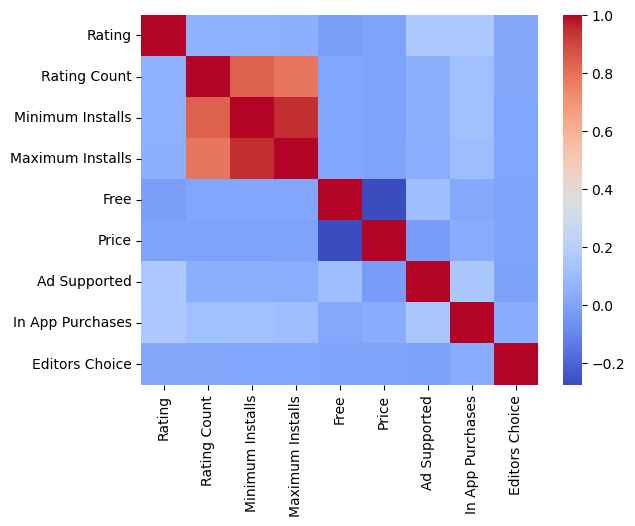

In [23]:
sns.heatmap(df.corr(), cmap= "coolwarm")

### EDA

We are checking our target variable 

In [24]:
df['Rating'].value_counts()/df.shape[0]*100.0

0.0    46.194226
5.0     4.320614
4.2     4.017767
4.4     3.654351
4.3     3.563497
4.5     3.412073
4.6     3.189986
4.1     2.988088
4.7     2.947708
4.0     2.887139
4.8     2.796285
3.9     2.513628
3.8     2.109832
4.9     2.109832
3.7     1.948314
3.6     1.645467
3.5     1.494044
3.4     1.221482
3.3     0.999394
3.2     0.908540
3.0     0.757117
3.1     0.635978
2.8     0.555219
2.5     0.474460
2.9     0.423985
2.7     0.423985
2.6     0.292752
2.3     0.201898
2.2     0.191803
2.0     0.191803
2.4     0.171613
1.8     0.151423
2.1     0.141328
1.6     0.131234
1.9     0.100949
1.5     0.070664
1.4     0.060569
1.7     0.040380
1.3     0.030285
1.2     0.020190
1.1     0.010095
Name: Rating, dtype: float64

EDA categorical columns 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9906 non-null   object 
 1   Rating            9906 non-null   float64
 2   Rating Count      9906 non-null   float64
 3   Minimum Installs  9906 non-null   float64
 4   Maximum Installs  9906 non-null   int64  
 5   Free              9906 non-null   int32  
 6   Price             9906 non-null   float64
 7   Content Rating    9906 non-null   object 
 8   Ad Supported      9906 non-null   int32  
 9   In App Purchases  9906 non-null   int32  
 10  Editors Choice    9906 non-null   int32  
dtypes: float64(4), int32(4), int64(1), object(2)
memory usage: 773.9+ KB


In [26]:
categorical_df = df.select_dtypes('object').copy()
categorical_df.head()

,Category,Content Rating
0,Entertainment,Everyone
1,Lifestyle,Everyone
2,Shopping,Everyone
3,Finance,Everyone
4,Food & Drink,Everyone


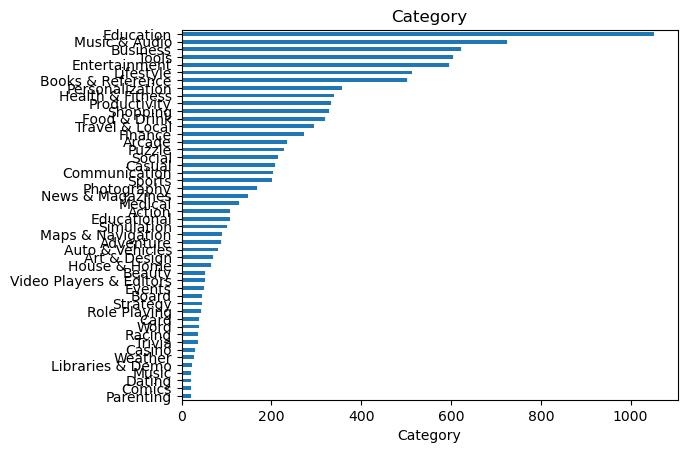

In [27]:
for column in categorical_df.columns[:-1]:

    # Visualize a summary of each
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel(column)
    plt.title(column)
    plt.show()

EDA Numerical columns 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9906 non-null   object 
 1   Rating            9906 non-null   float64
 2   Rating Count      9906 non-null   float64
 3   Minimum Installs  9906 non-null   float64
 4   Maximum Installs  9906 non-null   int64  
 5   Free              9906 non-null   int32  
 6   Price             9906 non-null   float64
 7   Content Rating    9906 non-null   object 
 8   Ad Supported      9906 non-null   int32  
 9   In App Purchases  9906 non-null   int32  
 10  Editors Choice    9906 non-null   int32  
dtypes: float64(4), int32(4), int64(1), object(2)
memory usage: 773.9+ KB


In [29]:
numeric_df = df.select_dtypes(['int32','float64', 'int64']).copy()
numeric_df.head()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
0,3.9,68.0,10000.0,10291,1,0.0,0,0,0
1,0.0,0.0,50.0,90,1,0.0,0,0,0
2,4.3,918.0,100000.0,135038,1,0.0,1,0,0
3,5.0,6.0,50.0,53,1,0.0,0,0,0
4,4.3,830.0,100000.0,142498,1,0.0,1,0,0


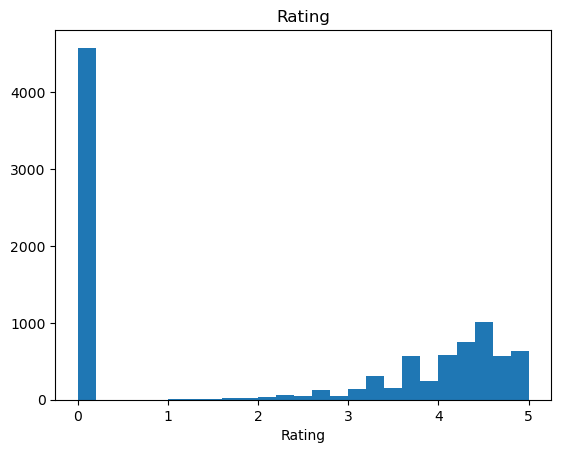

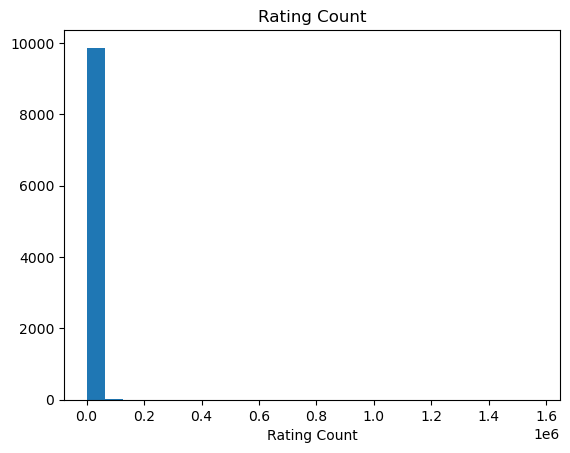

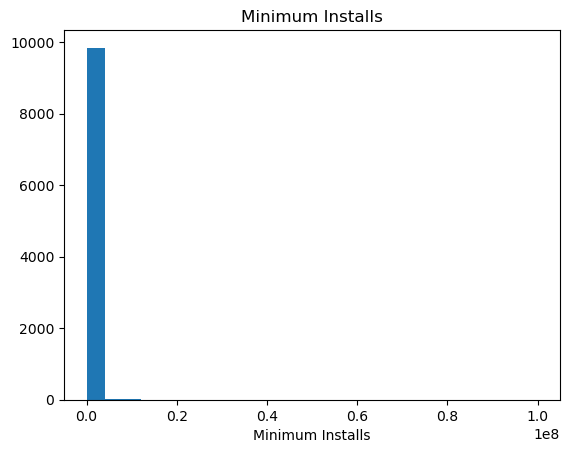

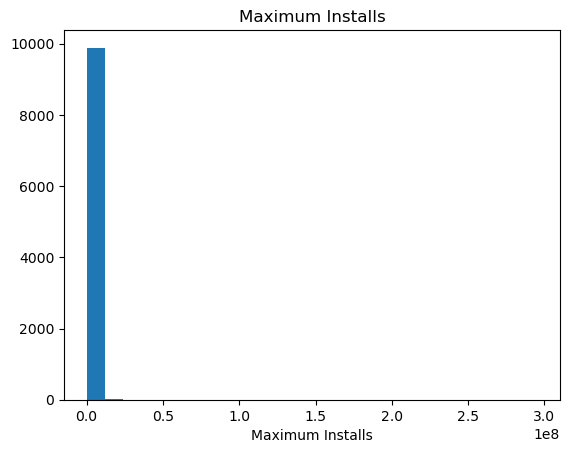

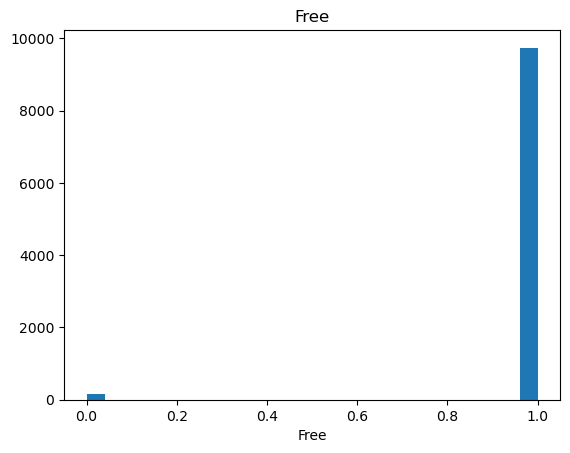

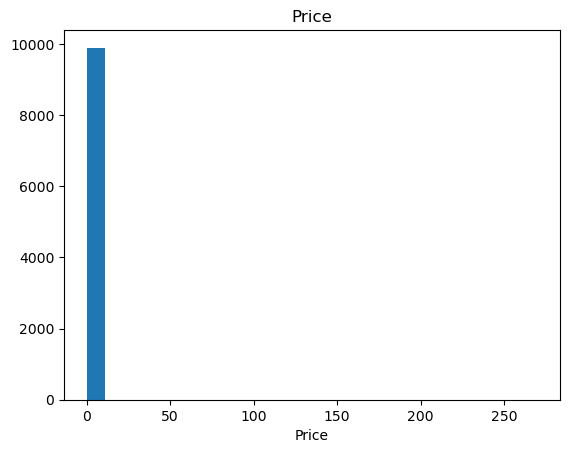

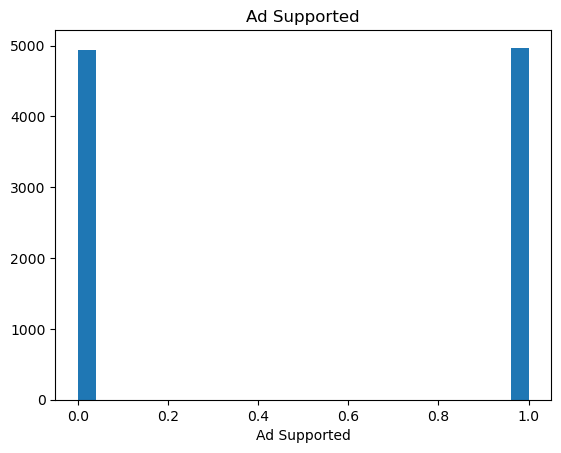

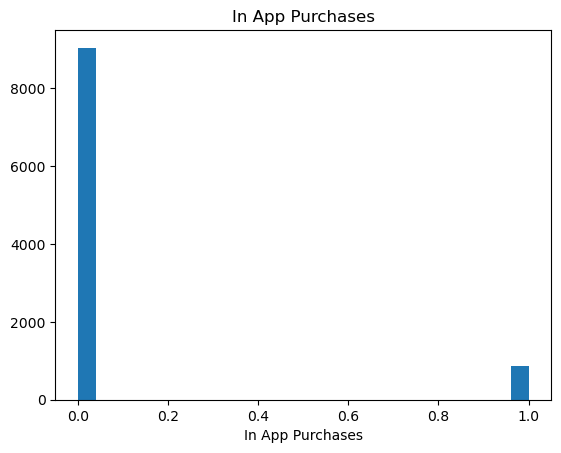

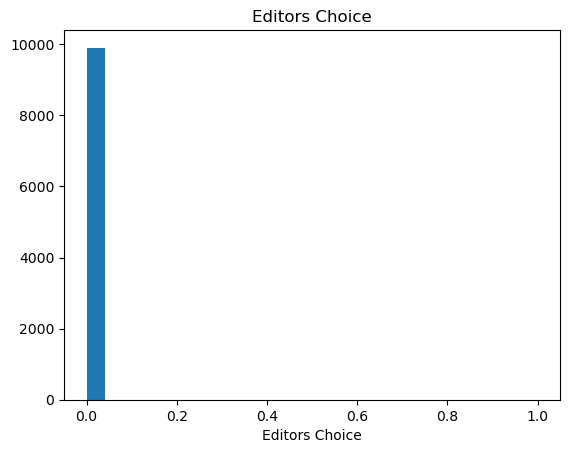

In [30]:
for column in numeric_df:
    plt.figure()
    plt.hist(df[column], bins=25)
    plt.title(column)
    plt.xlabel(column)
    plt.show()

In [31]:
df.groupby('Rating').mean()

C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\3831588271.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Rating').mean()


,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Rating,,,,,,,,
0.0,0.000000,542.116914,9.407579e+02,0.986451,0.118089,0.416521,0.036058,0.000000
1.1,47.000000,1000.000000,2.212000e+03,1.000000,0.000000,0.000000,0.000000,0.000000
1.2,46.000000,1000.000000,2.278000e+03,1.000000,0.000000,0.000000,0.000000,0.000000
1.3,1440.666667,33700.000000,1.167567e+05,0.666667,1.496667,0.333333,0.000000,0.000000
1.4,238.166667,17166.666667,2.056867e+04,0.833333,2.165000,0.500000,0.166667,0.000000
1.5,101.428571,10571.428571,2.026129e+04,1.000000,0.000000,0.142857,0.142857,0.000000
1.6,280.307692,52730.769231,7.167062e+04,1.000000,0.000000,0.384615,0.076923,0.000000
1.7,2242.000000,253000.000000,3.579080e+05,1.000000,0.000000,0.000000,0.000000,0.000000
1.8,187.000000,12380.000000,4.308893e+04,1.000000,0.000000,0.200000,0.133333,0.000000


Text(0.5, 1.0, 'The higher average rating is 4.2')

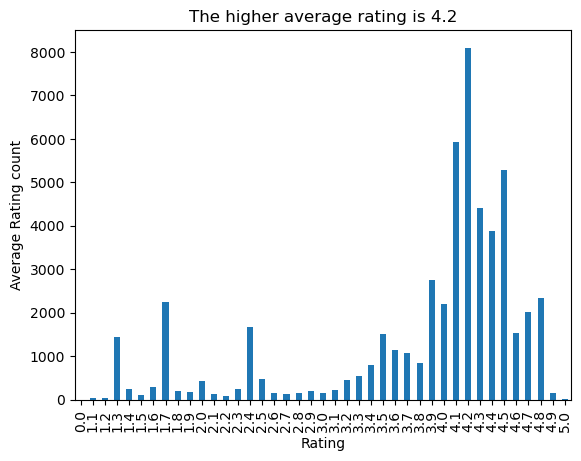

In [32]:
df.groupby('Rating')['Rating Count'].mean().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average Rating count')
plt.title('The higher average rating is 4.2')

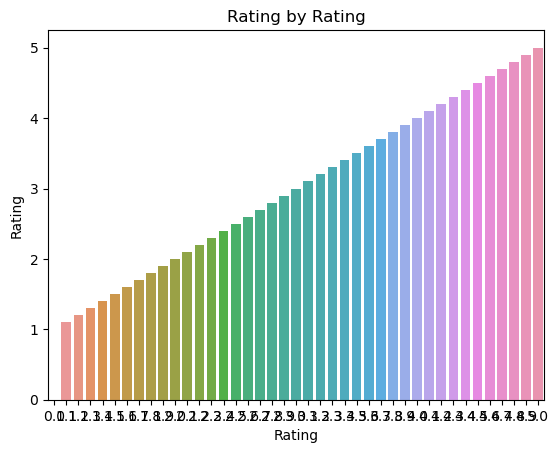

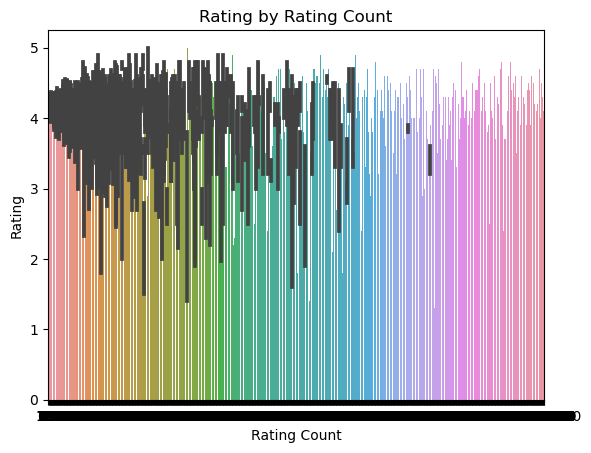

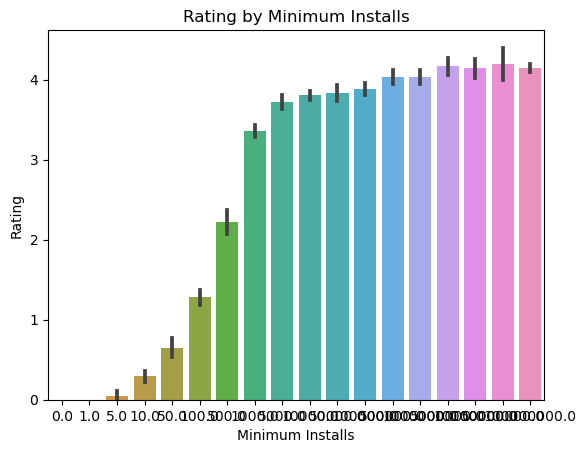

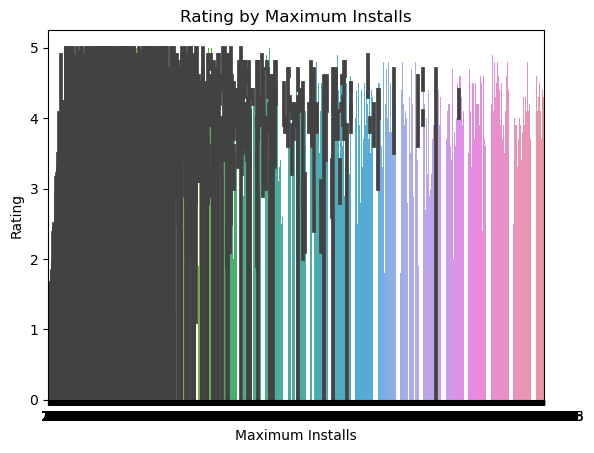

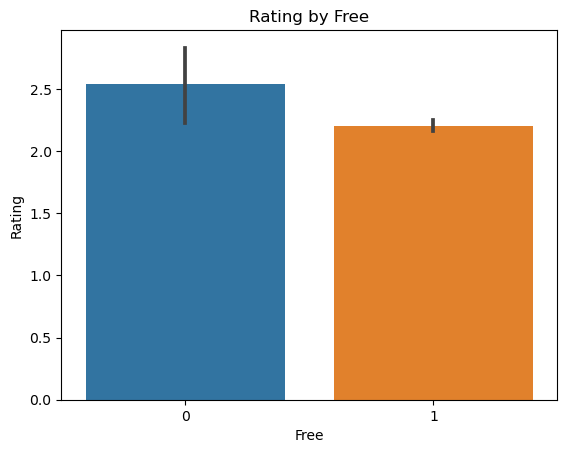

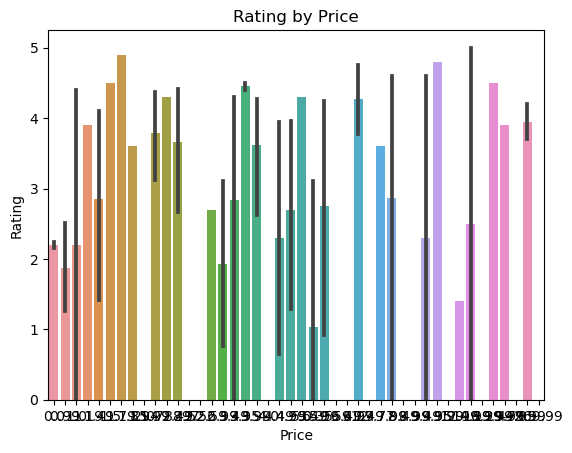

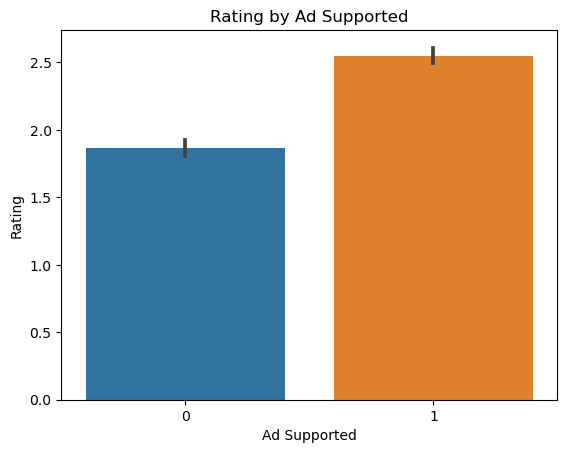

In [33]:
for col in numeric_df.iloc[:, :-2]:
    sns.barplot(x=col, y='Rating', data=df)
    plt.title(f'Rating by {col}')
    plt.show()

Text(0.5, 1.0, 'There is more rating on Ad supported Application')

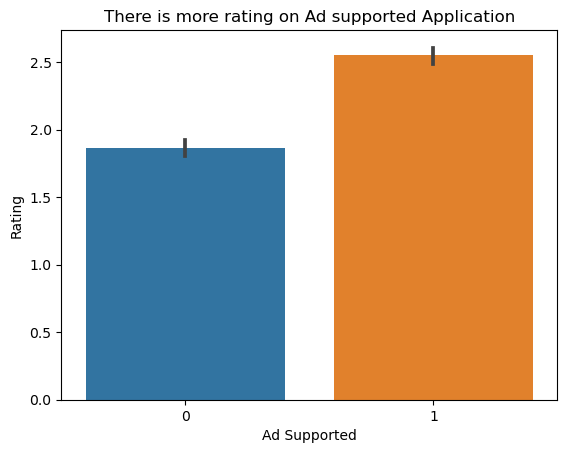

In [34]:
sns.barplot(x = 'Ad Supported', y = 'Rating', data = df)
plt.title('There is more rating on Ad supported Application')

Text(0.5, 1.0, 'There is more rating on free application')

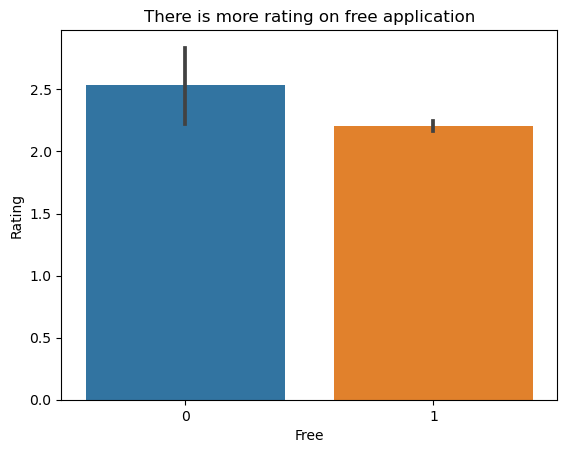

In [35]:
sns.barplot(x = 'Free', y = 'Rating', data = df)
plt.title('There is more rating on free application')

Text(0.5, 1.0, ' There is more installs when threre is no rating')

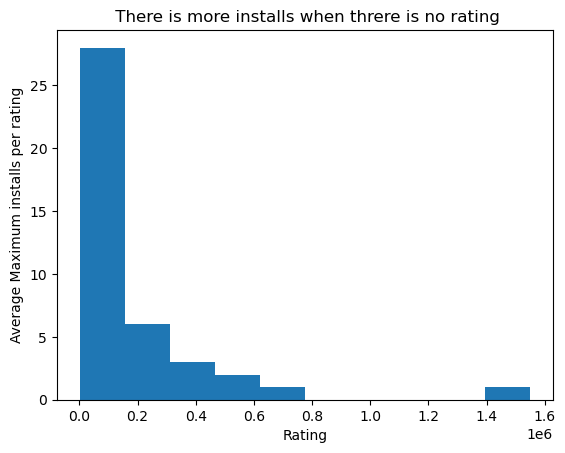

In [36]:
df.groupby('Rating')['Maximum Installs'].mean().plot(kind='hist')
plt.xlabel('Rating')
plt.ylabel('Average Maximum installs per rating')
plt.title(' There is more installs when threre is no rating')

Text(0.5, 1.0, '')

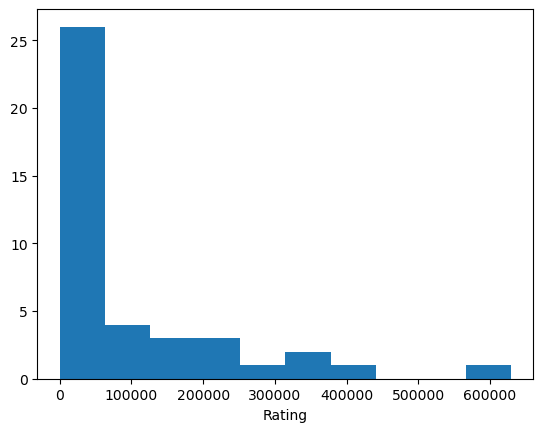

In [37]:
df.groupby('Rating')['Minimum Installs'].mean().plot(kind='hist')
plt.xlabel('Rating')
plt.ylabel('')
plt.title('')

Text(0.5, 1.0, '')

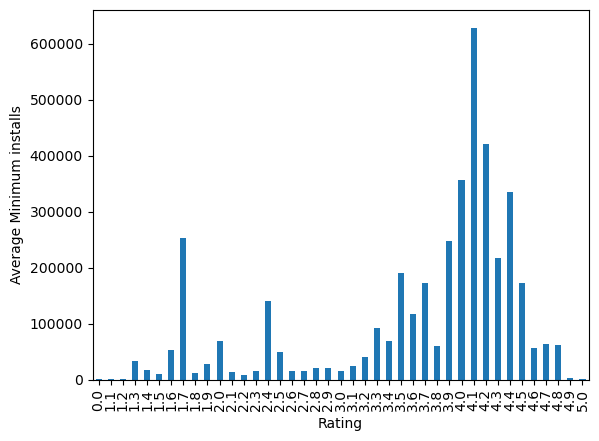

In [38]:
df.groupby('Rating')['Minimum Installs'].mean().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average Minimum installs')
plt.title('')

Text(0.5, 1.0, 'The free applications are the most ad supported')

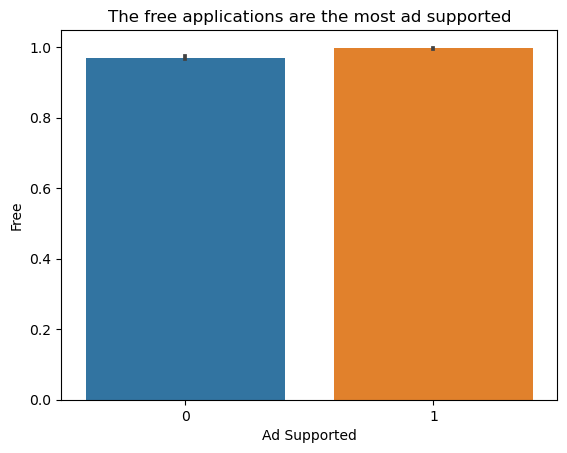

In [39]:
sns.barplot(x = 'Ad Supported', y = 'Free', data = df)
plt.title('The free applications are the most ad supported')

C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\2178155573.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Rating')['Free', 'Price'].mean().plot(kind='bar')


Text(0.5, 1.0, 'The priced applications are mostly rated 1.4')

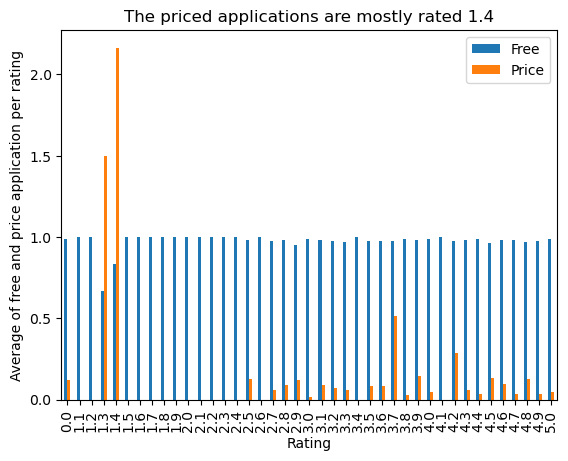

In [40]:
df.groupby('Rating')['Free', 'Price'].mean().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average of free and price application per rating')
plt.title('The priced applications are mostly rated 1.4')

C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\627335066.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Ad Supported')['Free', 'Price'].mean().plot(kind='bar')


Text(0.5, 1.0, '')

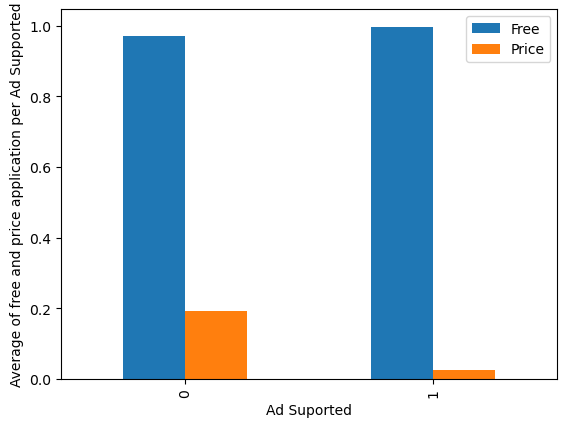

In [41]:
df.groupby('Ad Supported')['Free', 'Price'].mean().plot(kind='bar')
plt.xlabel('Ad Suported')
plt.ylabel('Average of free and price application per Ad Supported')
plt.title('')

C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\3068989811.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Free')['In App Purchases', 'Ad Supported'].mean().plot(kind='bar')


Text(0.5, 1.0, '')

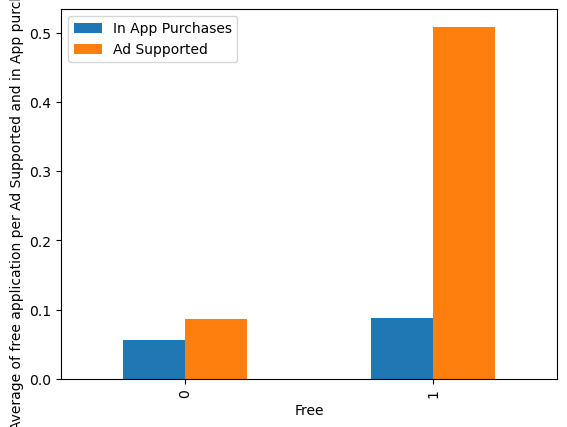

In [42]:
df.groupby('Free')['In App Purchases', 'Ad Supported'].mean().plot(kind='bar')
plt.xlabel('Free')
plt.ylabel('Average of free application per Ad Supported and in App purchases')
plt.title('')

C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\599346584.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Rating')['In App Purchases', 'Ad Supported'].mean().plot(kind='bar')


Text(0.5, 1.0, '')

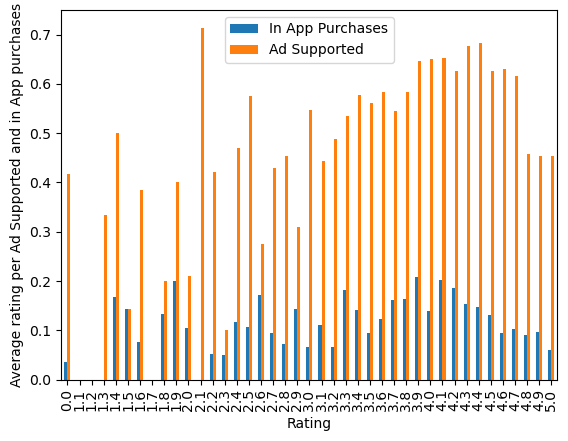

In [43]:
df.groupby('Rating')['In App Purchases', 'Ad Supported'].mean().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average rating per Ad Supported and in App purchases')
plt.title('')

Text(0.5, 1.0, '')

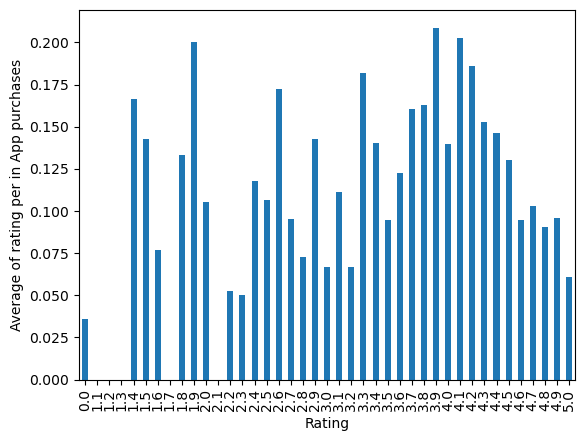

In [44]:
df.groupby('Rating')['In App Purchases'].mean().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average of rating per in App purchases')
plt.title('')

Text(0.5, 1.0, '')

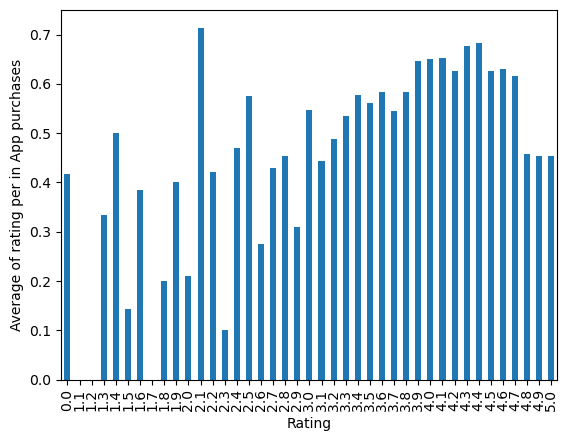

In [45]:
df.groupby('Rating')['Ad Supported'].mean().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average of rating per in App purchases')
plt.title('')

Text(0.5, 1.0, '')

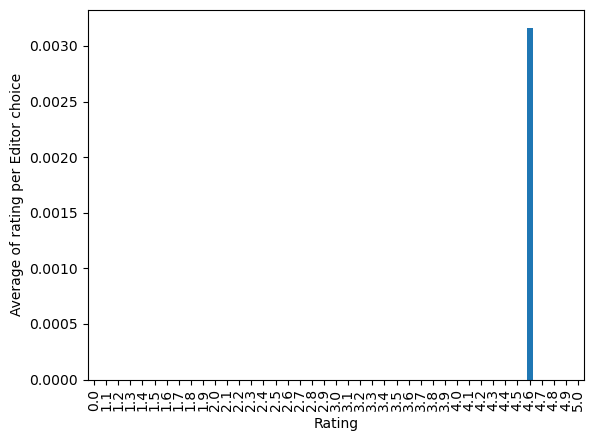

In [46]:
df.groupby('Rating')['Editors Choice'].mean().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average of rating per Editor choice')
plt.title('')

### Prepocessing

In [47]:
#Listing categorical and numerical columns
cat_cols = df.select_dtypes(include = 'object').columns
num_cols = df.select_dtypes(exclude = 'object').columns

In [48]:
#Print categorical and numerical columns
print(cat_cols)
print(num_cols)

Index(['Category', 'Content Rating'], dtype='object')
Index(['Rating', 'Rating Count', 'Minimum Installs', 'Maximum Installs',
       'Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9906.0,2.209691,2.108915e+00,0.0,0.0,3.0,4.30,5.000000e+00
Rating Count,9906.0,1404.259136,2.359045e+04,0.0,0.0,6.0,40.75,1.569485e+06
Minimum Installs,9906.0,96958.323440,1.685981e+06,0.0,50.0,500.0,5000.00,1.000000e+08
Maximum Installs,9906.0,181538.565718,3.734170e+06,0.0,88.0,734.5,7113.75,2.955299e+08
Free,9906.0,0.983646,1.268381e-01,0.0,1.0,1.0,1.00,1.000000e+00
Price,9906.0,0.108279,3.050349e+00,0.0,0.0,0.0,0.00,2.699900e+02
Ad Supported,9906.0,0.501615,5.000226e-01,0.0,0.0,1.0,1.00,1.000000e+00
In App Purchases,9906.0,0.087018,2.818756e-01,0.0,0.0,0.0,0.00,1.000000e+00
Editors Choice,9906.0,0.000101,1.004733e-02,0.0,0.0,0.0,0.00,1.000000e+00


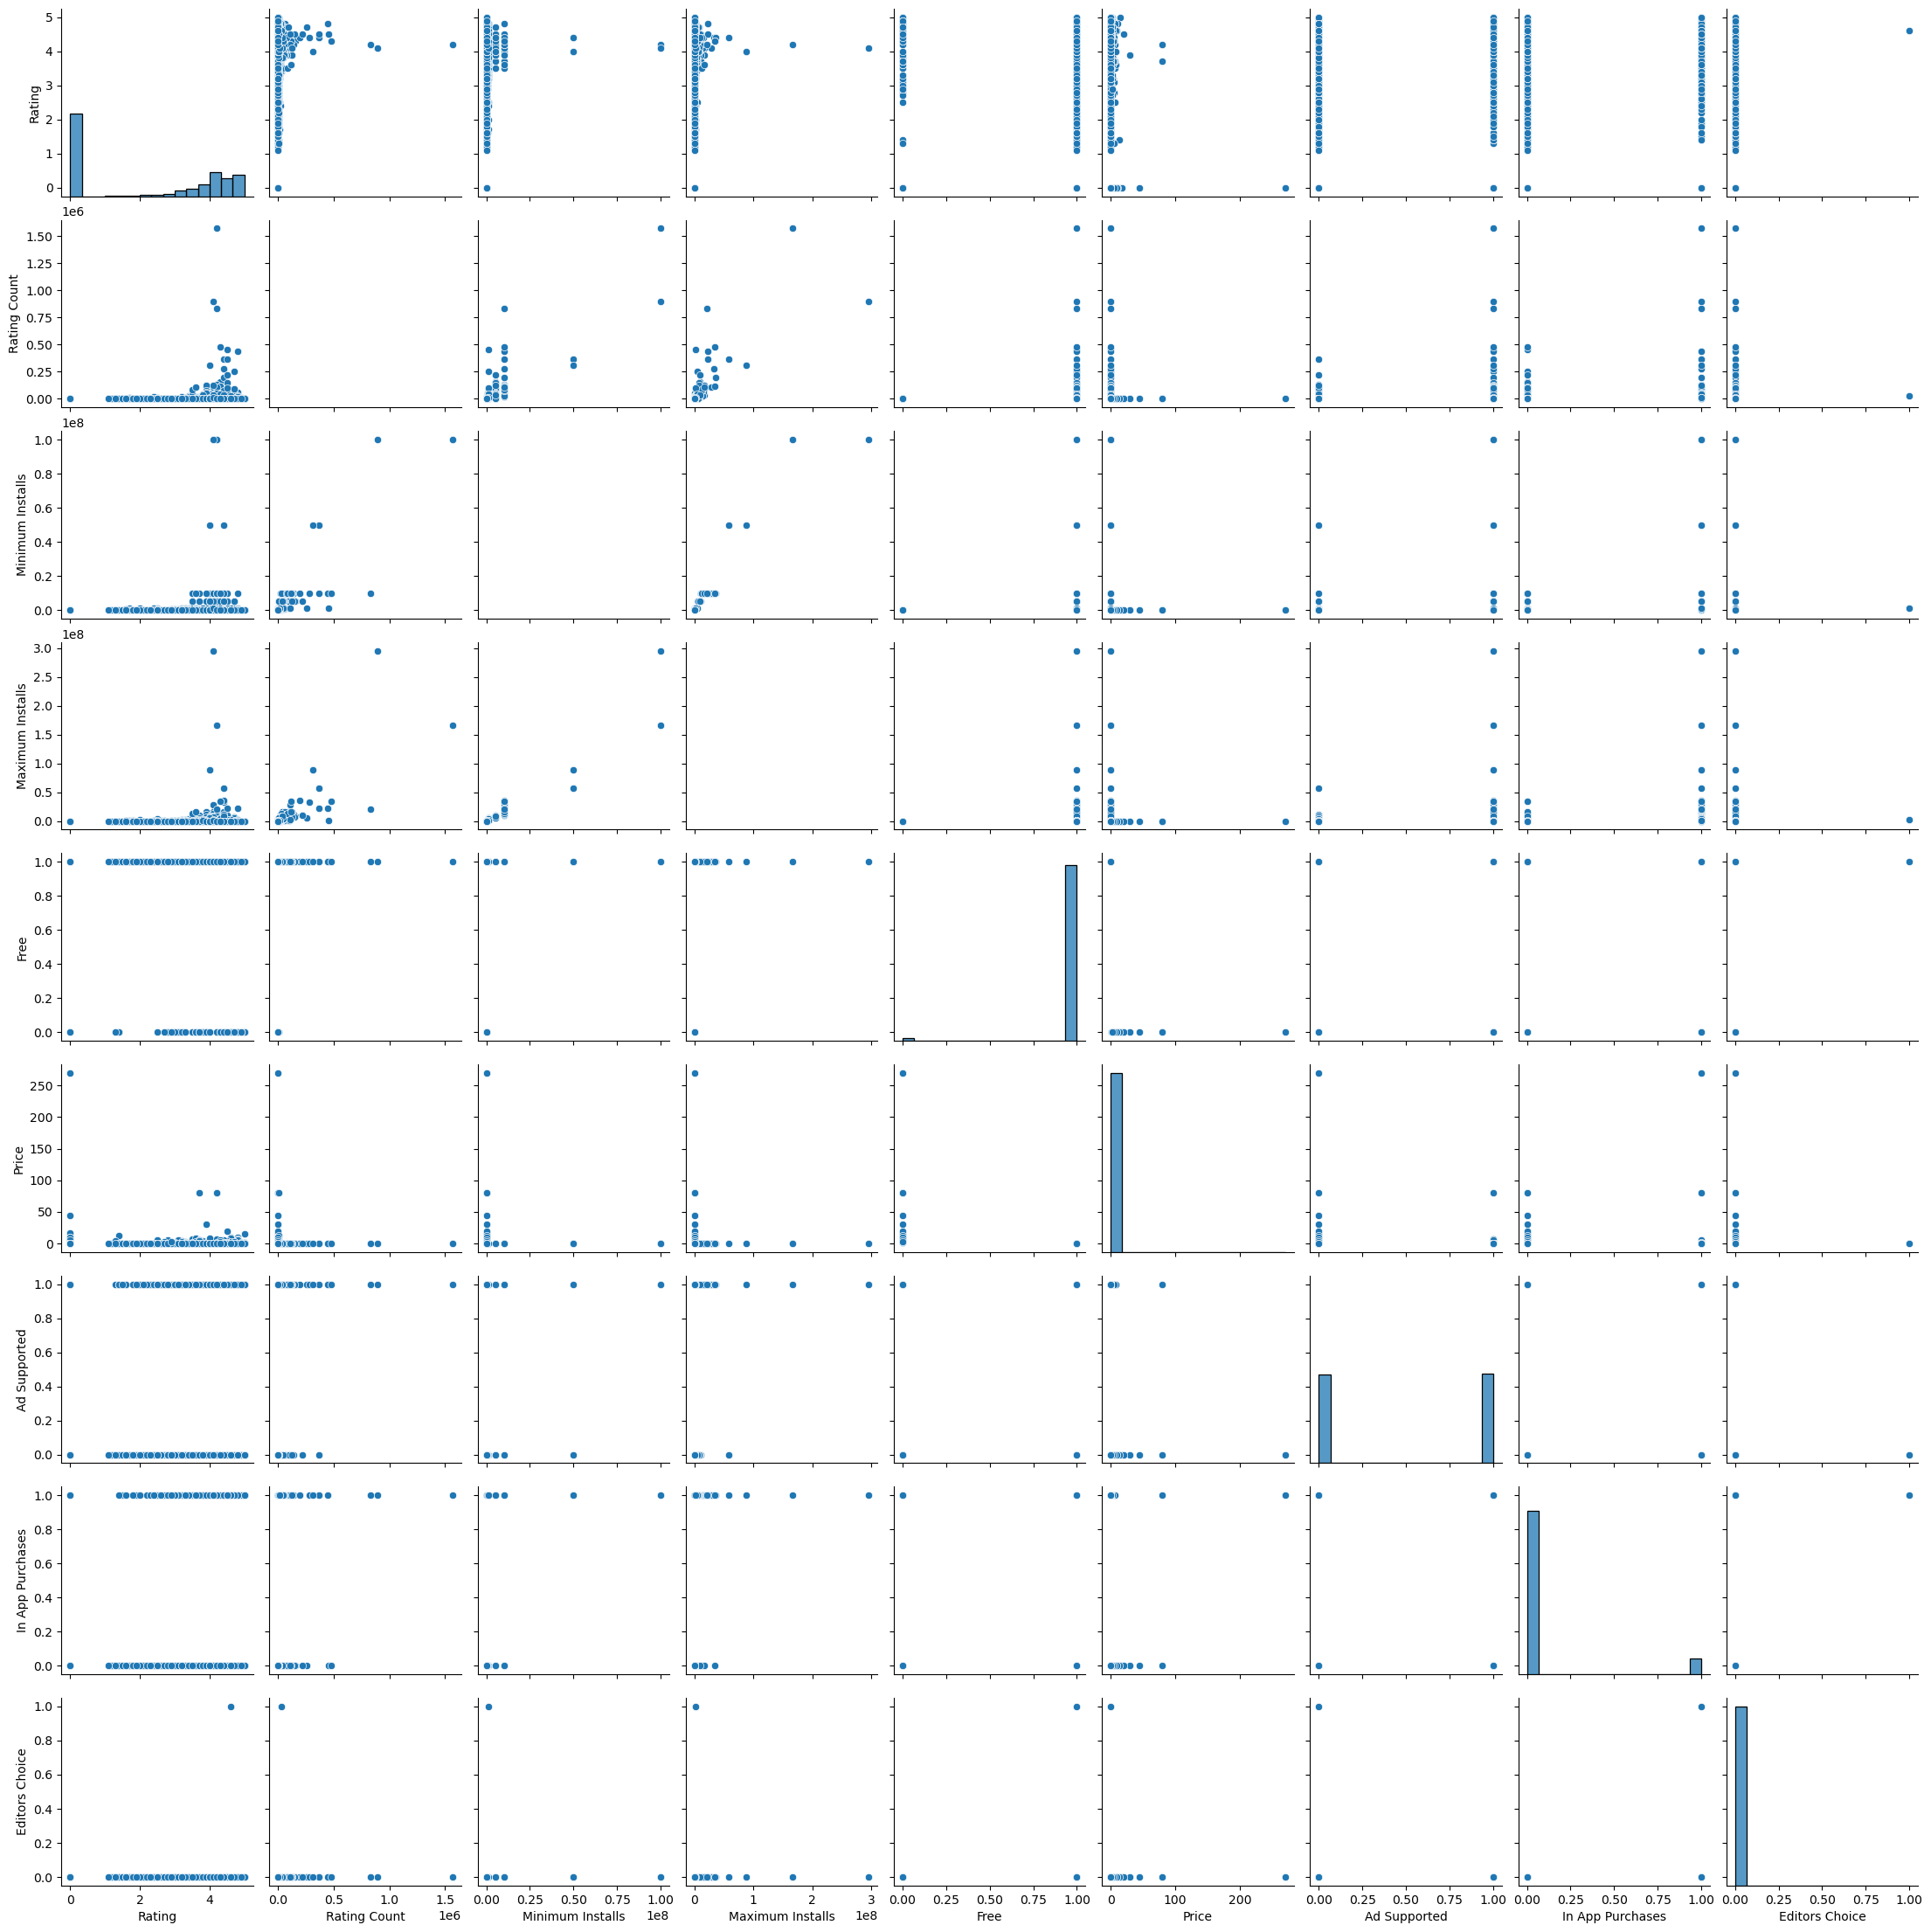

In [50]:
sns.pairplot(df)

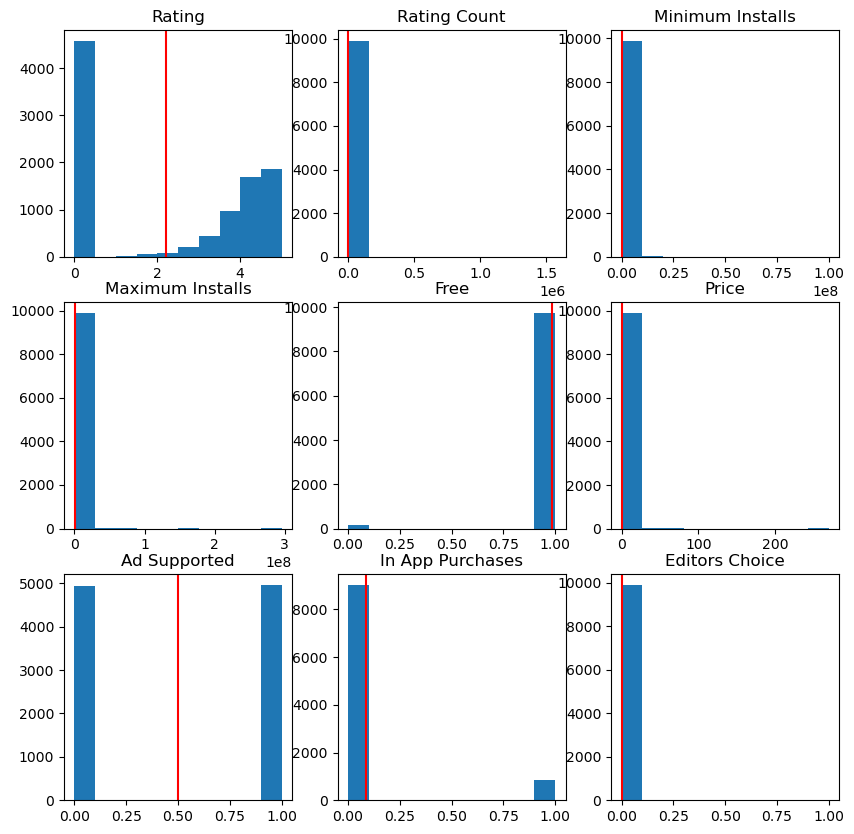

In [55]:
plt.subplots(3, 3, figsize = (10, 10))
i = 1
for num_col in num_cols:
    plt.subplot(3, 3, i)
    plt.hist(df[num_col])
    plt.axvline(df[num_col].mean(), color = 'red')
    plt.title(num_col)
    i += 1

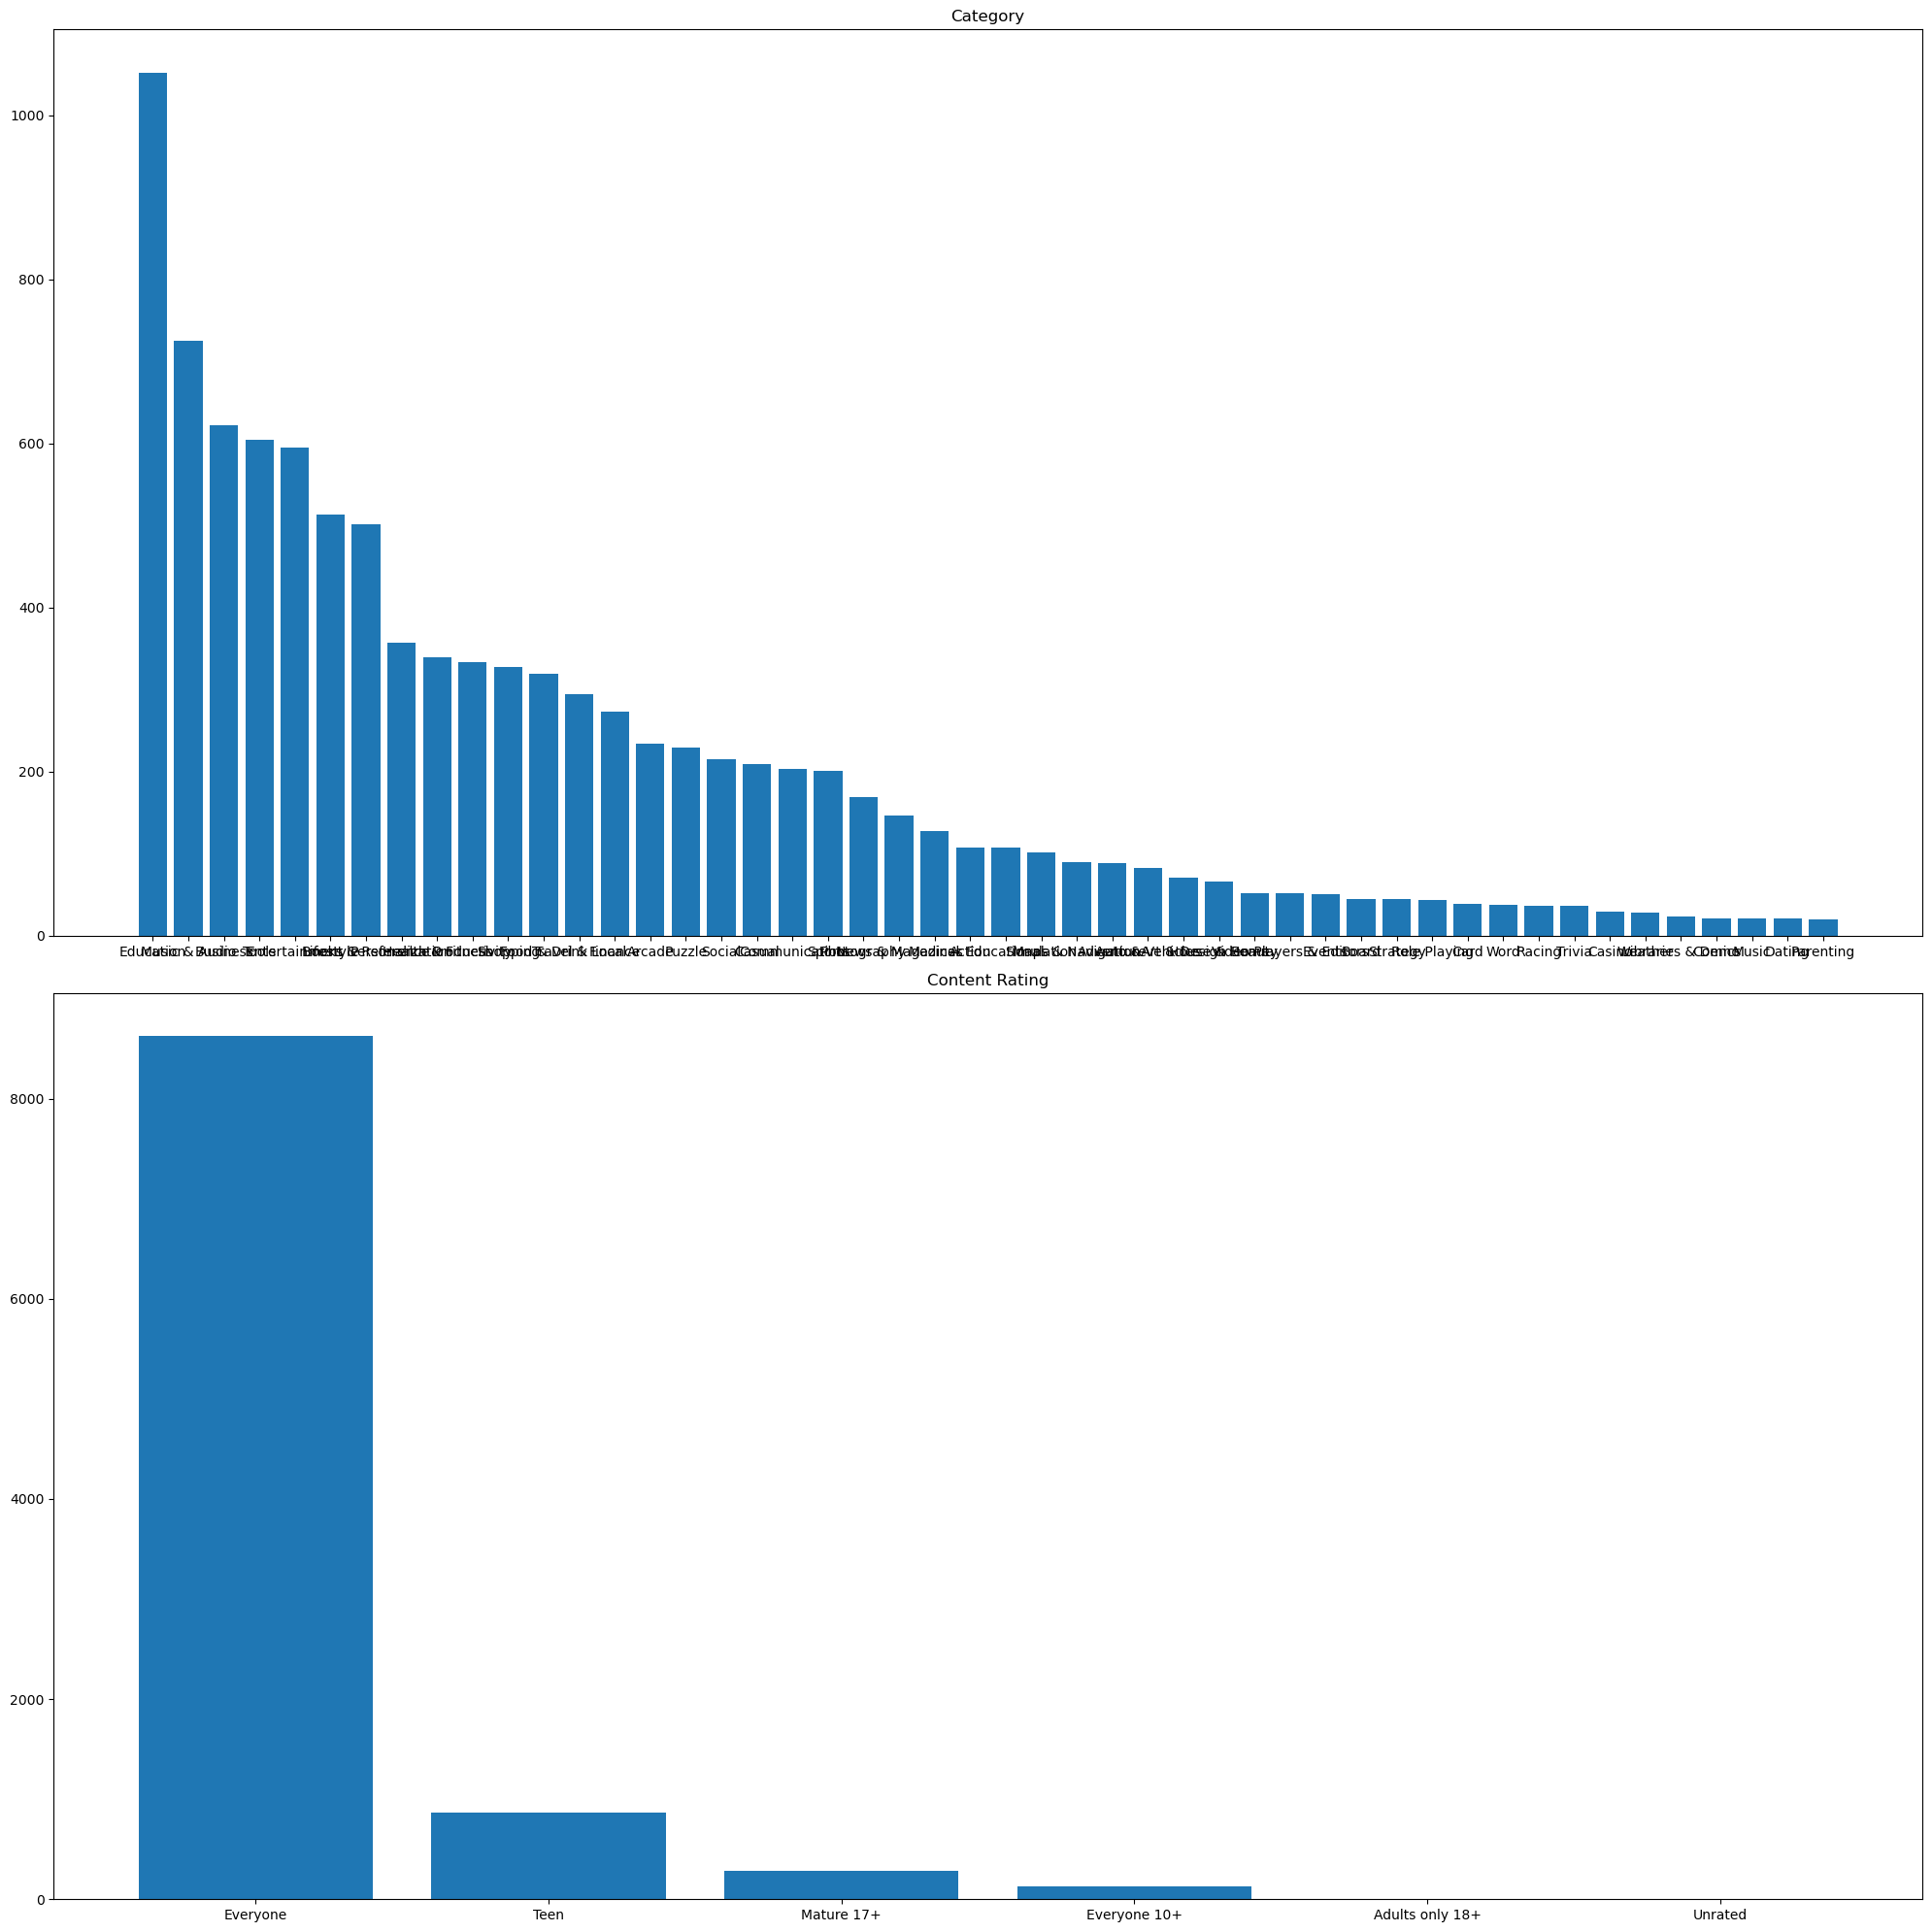

In [57]:
plt.subplots(2, 1, figsize = (20, 20))
i = 1
for cat_col in cat_cols:
    plt.subplot(2, 1, i)
    plt.bar(df[cat_col].value_counts().index, df[cat_col].value_counts().values)
    plt.title(cat_col)
    i += 1
    
plt.tight_layout()

### Linear Regression Model 

In [68]:
X = df['Rating']
y = df['Minimum Installs']

In [69]:
np.cov(X, y)

array([[4.44752445e+00, 1.84058071e+05],
       [1.84058071e+05, 2.84253098e+12]])

In [70]:
df.cov()

C:\Users\lelon\AppData\Local\Temp\ipykernel_21304\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Rating,4.447524,2.847135e+03,1.840581e+05,3.454182e+05,-0.005354,-0.023773,0.171140,0.094230,0.000241
Rating Count,2847.135257,5.565093e+08,3.339973e+10,6.914400e+10,18.983542,-109.089619,489.368234,759.326868,2.465799
Minimum Installs,184058.071232,3.339973e+10,2.842531e+12,5.967946e+12,1519.192266,-9785.073381,33339.198165,54321.654840,91.170285
Maximum Installs,345418.215042,6.914400e+10,5.967946e+12,1.394403e+13,2861.121418,-18644.898887,67363.125184,106295.754200,179.737651
Free,-0.005354,1.898354e+01,1.519192e+03,2.861121e+03,0.016088,-0.106519,0.006791,0.000515,0.000002
Price,-0.023773,-1.090896e+02,-9.785073e+03,-1.864490e+04,-0.106519,9.304630,-0.041215,0.027872,-0.000011
Ad Supported,0.171140,4.893682e+02,3.333920e+04,6.736313e+04,0.006791,-0.041215,0.250023,0.021162,-0.000051
In App Purchases,0.094230,7.593269e+02,5.432165e+04,1.062958e+05,0.000515,0.027872,0.021162,0.079454,0.000092
Editors Choice,0.000241,2.465799e+00,9.117029e+01,1.797377e+02,0.000002,-0.000011,-0.000051,0.000092,0.000101


Text(0.5, 1.0, '')

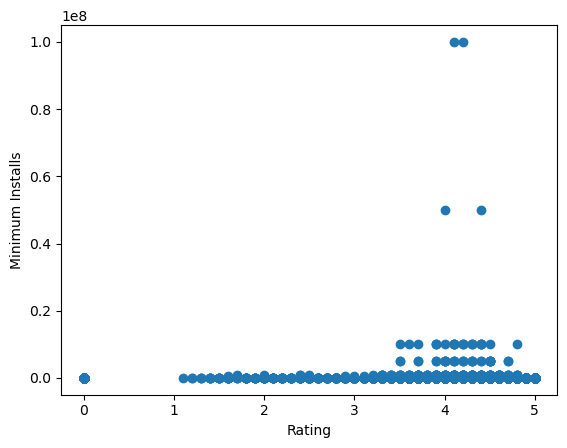

In [73]:
plt.scatter(df['Rating'], df['Minimum Installs'])
plt.xlabel('Rating')
plt.ylabel('Minimum Installs')
plt.title('')

In [74]:
np.corrcoef(X,y)

array([[1.        , 0.05176582],
       [0.05176582, 1.        ]])

In [76]:
stats.pearsonr(X,y)

PearsonRResult(statistic=0.0517658191959612, pvalue=2.536301692153115e-07)

In [79]:
X_withconstant = sm.add_constant(X)
X_withconstant

,const,Rating
0,1.0,3.9
1,1.0,0.0
2,1.0,4.3
3,1.0,5.0
4,1.0,4.3
...,...,...
9994,1.0,0.0
9995,1.0,4.3
9997,1.0,5.0
9998,1.0,0.0


In [80]:
regression = sm.OLS(y, X_withconstant)
regression_results = regression.fit()
regression_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Minimum Installs   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.61
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           2.54e-07
Time:                        15:55:37   Log-Likelihood:            -1.5607e+05
No. Observations:                9906   AIC:                         3.122e+05
Df Residuals:                    9904   BIC:                         3.122e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5511.6128   2.45e+04      0.225      0.822   -4.25e+04    5.35e+04
Rating      4.138e+04   8022.421      5.159      0.000    2.57e+04    5.71e+04
==============================================================================
Omnibus:                    30702.923   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2901507588.559
Skew:                          47.847   Prob(JB):                         0.00
Kurtosis:                    2652.630   Cond. No.                         4.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""